In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
#%matplotlib inline

from scipy.stats import gaussian_kde
from scipy import stats
import os
import math

In [2]:
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (10, 10), 
        "axes.titlesize" : 10 
    }
)

In [3]:
sns.set_style("whitegrid")

In [22]:
corpus = pd.read_excel('telegram_data.xlsx')

In [23]:
corpus.shape

(11836, 7)

In [24]:
corpus.head(2)

,Unnamed: 0,text,id,channel,views_count_2,popularity,url
0,6786,import car auto parts in pakistan http ift tt ...,43,nastengraph,32,2.909091,https://t.me/nastengraph/43
1,2738,https telegra ph file fac41ad20abc38747e8a8 jp...,551,datarootlabs,3600,1.241379,https://t.me/datarootlabs/551


In [25]:
corpus['text'] = corpus['text'].astype('str')

In [26]:
mask = (corpus['text'].str.len() >= 200)

In [27]:
corpus = corpus.loc[mask]
print(corpus.shape)

(5997, 7)


In [28]:
corpus.to_csv('corpus.csv')

In [29]:
def factorplot(data, column, title=''):
    train_uniques = pd.melt(frame=data, value_vars=[column])
    train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                        'value'])['value'].count()) \
        .sort_index(level=[0, 1]) \
        .rename(columns={'value': 'count'}) \
        .reset_index()

    sns.factorplot(x='variable', y='count', hue='value', 
                   data=train_uniques, kind='bar', size=12);
    plt.title(title)

/home/renat/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/renat/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


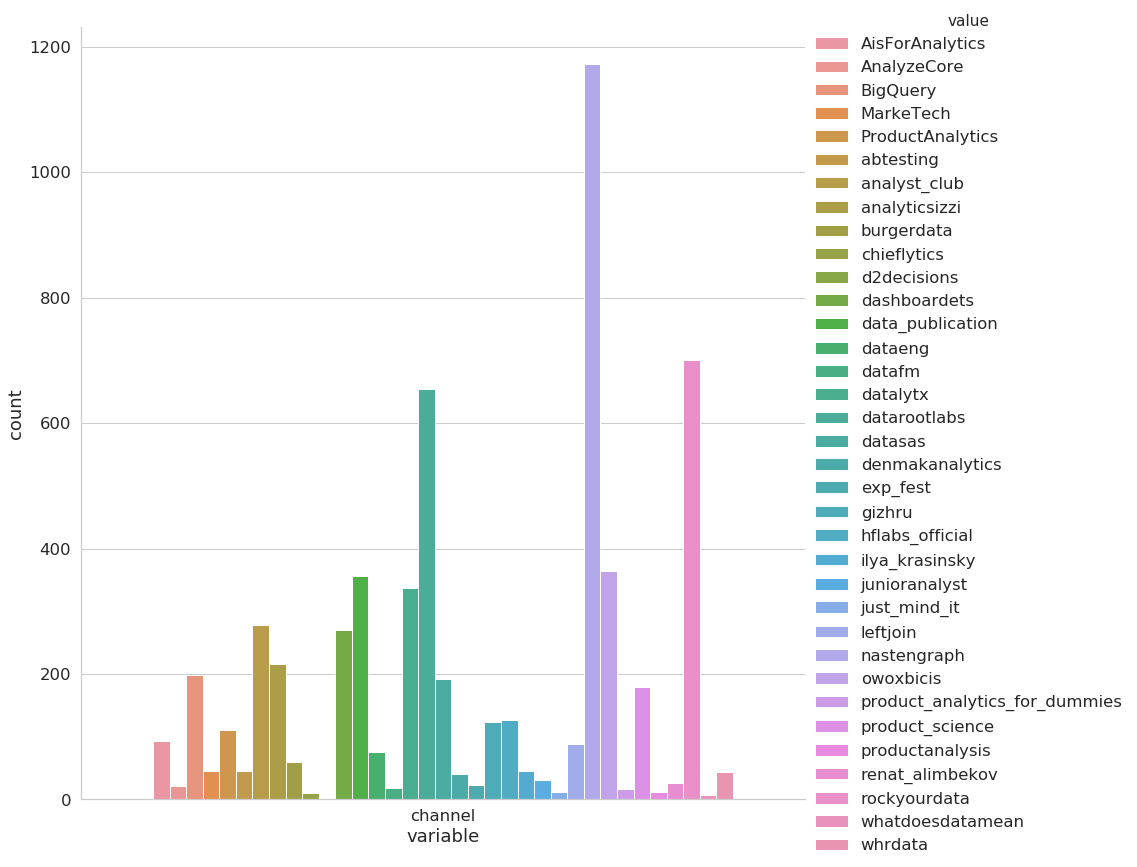

In [30]:
factorplot(corpus, 'channel')

In [31]:
from wordcloud import WordCloud
import re

In [32]:
corpus = corpus[['text', 'id', 'channel', 'views_count_2', 'popularity', 'url']]
corpus.text = corpus.text.fillna('').astype(str)

def remove_links_and_quotes(text):
    try:
        return ' '.join([word for word in text.split() if 'http' not in word and '@' not in word])
    except:
        pass
corpus.text = corpus.text.apply(lambda x: remove_links_and_quotes(x))
corpus.fillna('', inplace=True)

corpus = corpus[corpus.text.apply(lambda x: len(x) > 0)]
corpus.text = corpus.text.apply(lambda x: ' '.join(re.split('\W+', x.lower())))

corpus.head(10)

,text,id,channel,views_count_2,popularity,url
1,telegra ph file fac41ad20abc38747e8a8 jpg open...,551,datarootlabs,3600,1.241379,https://t.me/datarootlabs/551
3,анализ выживаемости survival analysis класс ст...,421,datalytx,2300,1.352941,https://t.me/datalytx/421
4,одной из первых моих задач тут было внести нов...,9,junioranalyst,226,1.027273,https://t.me/junioranalyst/9
6,примерно так мы представляем себе студентов на...,838,datarootlabs,2200,0.758621,https://t.me/datarootlabs/838
7,hr data hr данные обучение персонала источники...,29,whrdata,735,1.305506,https://t.me/whrdata/29
8,неплохая вводная статья www datacamp com commu...,181,datalytx,1800,1.058824,https://t.me/datalytx/181
10,telegra ph file 5ef56a1073a30e88a8810 jpg битк...,241,data_publication,1100,1.137539,https://t.me/data_publication/241
13,media cdn images 1 medium com max 1024 1 vv zt...,893,nastengraph,7,0.636364,https://t.me/nastengraph/893
14,эксперимент собираем справочник подразделений ...,87,hflabs_official,281,0.992933,https://t.me/hflabs_official/87
16,wikipedia is human edited so naturally there a...,1331,nastengraph,9,0.818182,https://t.me/nastengraph/1331


In [33]:
corpus.to_csv('preproc_data.csv', index=None)

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_me(file_text):
    #firstly let's apply nltk tokenization
    tokens = nltk.word_tokenize(file_text)

    #drop stop_words
    stop_words = stopwords.words('russian')
    stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'за', 'было', 'ru', 'её', 'telegra','ph',
                      'com','www','ift','tt','jpg','file','d0', 'via','2018','d1','bit','ly','10','org','которые','очень', 'youtube', 'нужно', 'medium',
                      'google', 'данных', 'data', 'analytics', 'данные', 'research', 'который', 'blog', 'center', 'pew',
                      'который','20','youtu','также', 'года', 'работает', 'которая', 'данными', 'пользователей', 'помощью', 'работы', 'какие',
                       'time', 'png', '2017', '2019', 'несколько', 'новый', 'делать', 'просто', 'аналитики', 'сделать', 'какие', 
                       'почему', 'например', 'всем', 'решения', 'habr', 'статья', 'watch', 'видео', 'использовать', 
                       'время', 'youtu', 'пока', 'сегодня', 'поэтому', 'компании', '2020', 'пока',  'media', 'new', 'people', 'like', 'first', 'one', 
                       'time', 'post', 'owox','upshot','power','tag', 'flowingdata', 'tags', 'news', 'utm', 'лет', 'дата', 'смотреть', 'list', 'вообще', 
                       'людей', 'index', 'год', 'канал', 'человек', '04', 'mapbox','href','also', 'year', 'gov', 'many', 
                       'see', 'net', 'states', 'times', 'bea', 'years', 'analysis', 'state', 'would','ai','подробнее', 'позволяет', 'ga', 'facebook',
                       'курс', 'нам', 'analyst', 'аналитика', 'работать', 'вопросы', 'будут', 'вопрос', 'яндекс', 'могут', 'часто',
                       'team', 'images', 'max', 'cdn', 'maps', 'map', 'app', 'points', 'interest', 'search', 'event', 'use', 'story', '1024',
                       'html', 'make', 'get', 'want', 'world', 'two', 'every','say', 'americans', 'even', 'best', 'video', 'different', 'really',
                       'найти', 'обучения', 'день', 'бизнеса', 'времени', 'работу', 'стоит', 'можете', 'каждый',  'user', 'us', 'conversation', 'full',
                       'пример', 'towardsdatascience', 'percent', 'jobs', 'billion', 'pdf', '00', 'io', 'статьи', 'работе', 'аналитике', 'материалы', 'веб', 
                       'yandex', 'productanalytics', 'аналитиков', 'бесплатный', 'метод', 'master', 'анализа', 'club', 'системы', 'studio', 'информацию', 'графики',
                       'цвета', 'отчет', 'сайта', 'id', 'b0', 'dw', 'b5',  'b8', 'en', 'microsoft', 'bd', 'кстати', 'интересно', 'вебинар', 'общем', 'буду',
                       'всё', 'курсы', 'такое', 'работу', '12', 'сша', 'different', 'really', 'want', 'content', 'york', 'way', 'day', 'even', 'wp', 'video',
                       'времени', 'каждый', 'люди', 'можете', 'найти', 'продукт', 'россии', 'количество', 'продаж', 'команды', 'команда', 'co','vs', 'company', 
                       'model', 'кода', 'гайд', 'twitter',  'americans', 'percent', 'women', 'say', 'pewresearch', 'public', 'economic', 'text', 'read', 'personal',
                       '01', 'htm', '09', 'less', 'book', 'full', 'user', 'business', 'published', 'source', 'conversation', 'building', 'using', 'originally', 'highlighting',
                       'continuing', 'responding', 'users', 'goo', 'gl', 'rss', 'postid', 'howmuch', 'article', 'самом', 'деле', 'nytimes', 'interactive', 'wiki',
                       'wikipedia', 'точки', 'зрения', 'dou', 'ua', 'companies',' 80', '82', 'republicans', 'places', 'five', 'black', 'часть','30','онлайн',
                       'ссылка', 'статью', 'свой', 'посмотреть', 'ребята', 'именно', 'другие', 'часть', 'ниже', 'part', 'линк', 'ещё', '2016', 'та', '2016', '03',
                       'trump', 'income', 'election', 'country', 'still', 'house', 'howmuch', 'democrats', '000', '05', 'social', 'pay', 'хотя', 'показывает', 'важно', 'проблемы', 
                       'либо', 'случае', 'вроде', 'меньше', 'подход', 'статью', 'нашел', 'тех', 'цели', 'опыт', 'книг', 'написал', 'ещё', 'точки', 'понятно',
                       'need', 'five', 'used', 'find', 'go', 'part', 'based', 'think', 'good', 'live', 'uploads', 'анализ', 'онлайн', 'хочет', 'статью', 'бизнес', 'навыки', 'свои',
                       'канале', 'список', 'конференции', 'роста', 'нового', 'manager', 'стоимость', 'свой', '80', 'особенно', '82', 'немного', 'хотите', 'ссылке', 'году', 
                       'получить', 'аналитику', '19', 'сделали', 'которых', 'ссылка', 'материал', '15','использование', 'хорошая', 'результаты', 'узнать', 'блоге', 'исследования', 'результат',
                       'большой', 'весь', 'котором', 'пользователи', 'котором', 'разных', 'основе', 'статье', 'новые', 'сколько', 'lot', 'look', 'much', 'примеры', '07', 'большой', 'самое',
                       '08', 'идея', 'самых', 'многие', 'каждого', 'построения', 'новых','hr', 'work', 'real', 'articles', 'across', 'around', 'top'
                      ]),

    stop_words.extend(stopwords.words('english'))
    tokens = [i for i in tokens if ( i not in stop_words )]
    
    #cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]

    return ' '.join(tokens)

corpus.text = corpus.text.apply(lambda x: tokenize_me(x))

corpus.to_csv('Analysts_tokens.csv', index=None)

[nltk_data] Downloading package punkt to /home/renat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/renat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import os
import scikitplot as skplt
import seaborn as sns
import time

In [36]:
def plot_top_ngrams(text,ngrams=(1,1),top=10,max_features=100,color='rgba(0,255,255,0.5)'):
    cv=CountVectorizer(ngram_range=ngrams,max_features=max_features)
    trans_text=cv.fit_transform(text)
    col_sum=trans_text.sum(axis=0)
    word_index=[(word,col_sum[0,idx]) for word,idx in cv.vocabulary_.items()]
    sorted_word_index=sorted(word_index,key=lambda x:x[1],reverse=True)
    top_words_index=sorted_word_index[:top]
    top_words=[element[0] for element in top_words_index]
    counts=[element[1] for element in top_words_index]
    df = pd.DataFrame(zip(top_words,counts))
    df.columns = ['top_words', 'counts']
    df.set_index('top_words', inplace=True)
    df.sort_values('counts', ascending=False)
    df.plot(y='counts', kind='bar', legend=False)

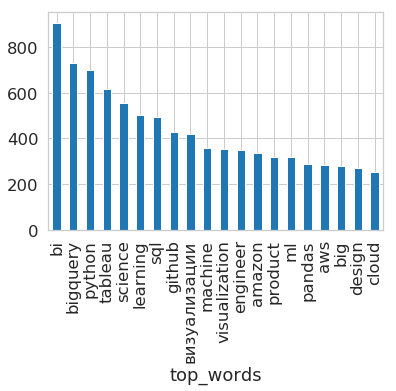

In [37]:
plot_top_ngrams(corpus.text,ngrams=(1,1),top=20,color='rgba(128,0,0,0.5)')

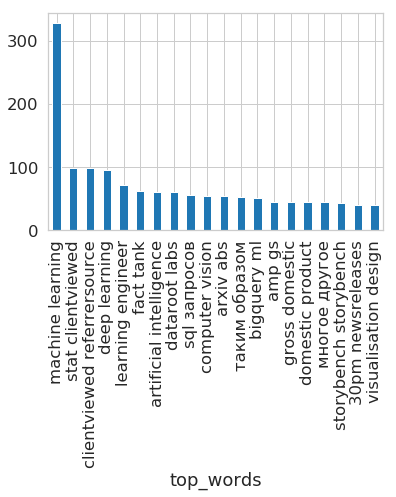

In [38]:
plot_top_ngrams(corpus.text,ngrams=(2,2),top=20,color='rgba(128,0,0,0.5)')

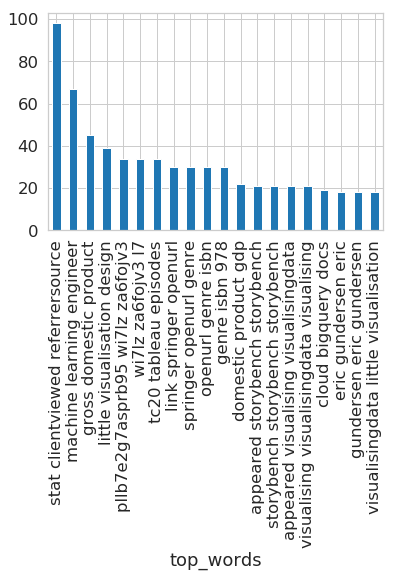

In [39]:
plot_top_ngrams(corpus.text,ngrams=(3,3),top=20,color='rgba(128,128,128,0.5)')

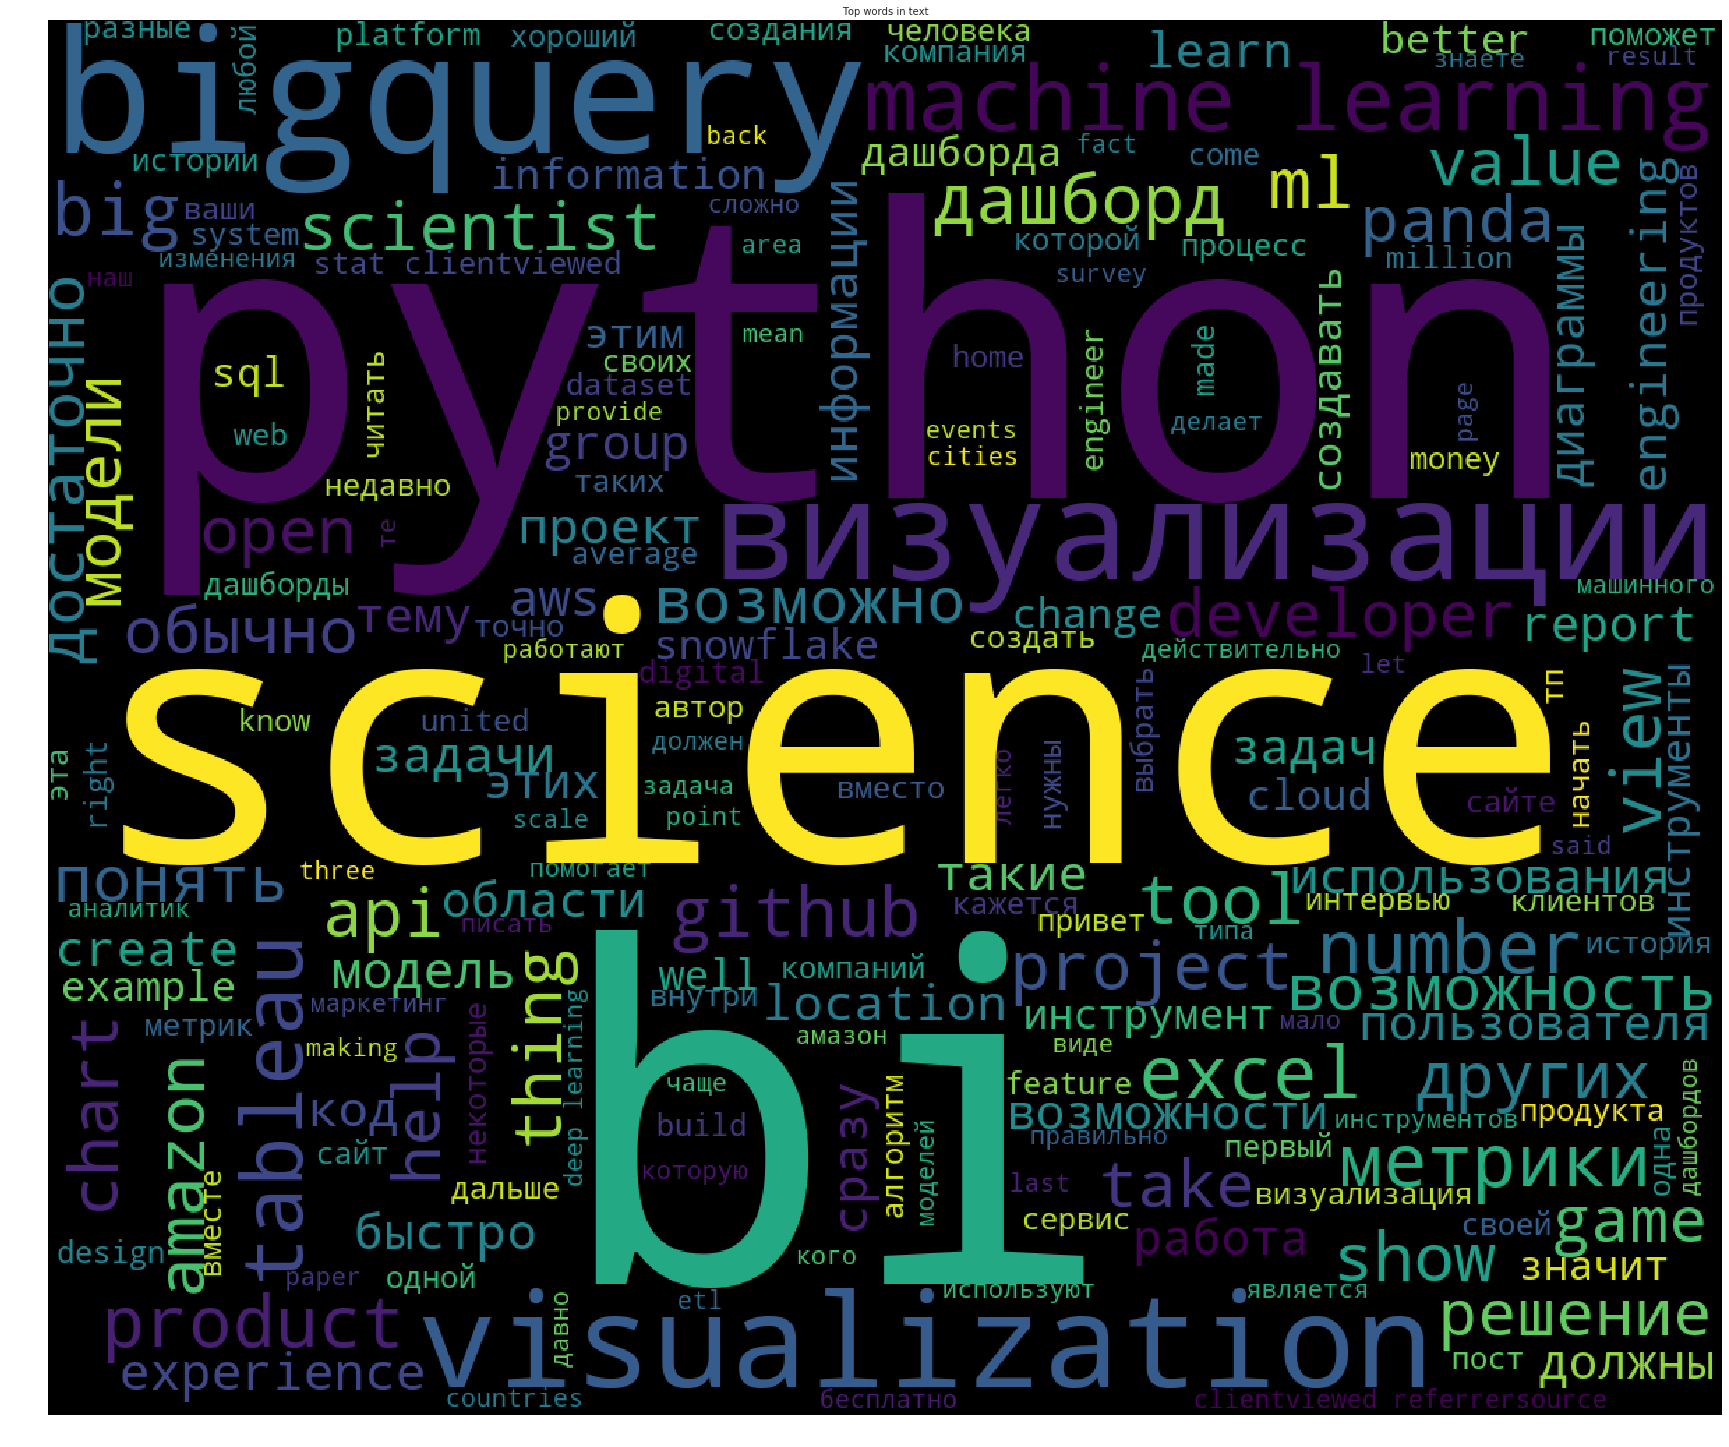

In [40]:
#text = ' '.join(corpus['text'])
text = ' '.join(str(v) for v in corpus['text'])
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.title('Top words in text')
plt.axis("off")
plt.show()

In [41]:
corpus.head(2)

,text,id,channel,views_count_2,popularity,url
1,fac41ad20abc38747e8a8 openai musenet генерации...,551,datarootlabs,3600,1.241379,https://t.me/datarootlabs/551
3,выживаемости survival класс статистических мод...,421,datalytx,2300,1.352941,https://t.me/datalytx/421


In [42]:
corpus.groupby('channel')['text'].count().sort_values(ascending=False)

channel
nastengraph                      1173
rockyourdata                      701
datarootlabs                      654
owoxbicis                         365
data_publication                  356
datalytx                          337
analyst_club                      278
dashboardets                      270
analyticsizzi                     216
BigQuery                          198
datasas                           192
product_science                   180
hflabs_official                   126
gizhru                            123
ProductAnalytics                  110
AisForAnalytics                    94
leftjoin                           88
dataeng                            76
burgerdata                         60
MarkeTech                          46
ilya_krasinsky                     46
abtesting                          45
whrdata                            43
denmakanalytics                    41
junioranalyst                      31
renat_alimbekov                    26
exp_

In [43]:
total_views = pd.pivot_table(corpus, values = 'views_count_2', columns=['channel'], aggfunc=np.sum).T

In [44]:
total_views = total_views.reset_index()
total_views;

In [45]:
total_views.channel.values

array(['AisForAnalytics', 'AnalyzeCore', 'BigQuery', 'MarkeTech',
       'ProductAnalytics', 'abtesting', 'analyst_club', 'analyticsizzi',
       'burgerdata', 'chieflytics', 'd2decisions', 'dashboardets',
       'data_publication', 'dataeng', 'datafm', 'datalytx',
       'datarootlabs', 'datasas', 'denmakanalytics', 'exp_fest', 'gizhru',
       'hflabs_official', 'ilya_krasinsky', 'junioranalyst',
       'just_mind_it', 'leftjoin', 'nastengraph', 'owoxbicis',
       'product_analytics_for_dummies', 'product_science',
       'productanalysis', 'renat_alimbekov', 'rockyourdata',
       'whatdoesdatamean', 'whrdata'], dtype=object)

In [46]:
total_views.groupby(total_views.channel).views_count_2.sum()

channel
AisForAnalytics                     9452
AnalyzeCore                        33975
BigQuery                         1061483
MarkeTech                         147481
ProductAnalytics                  276957
abtesting                         115004
analyst_club                      779284
analyticsizzi                      13243
burgerdata                         96335
chieflytics                         8041
d2decisions                          218
dashboardets                      493732
data_publication                  571045
dataeng                            80606
datafm                              9974
datalytx                          622415
datarootlabs                     1848125
datasas                           175978
denmakanalytics                       89
exp_fest                           45188
gizhru                            324056
hflabs_official                    54409
ilya_krasinsky                    156500
junioranalyst                       6816
just_min

In [47]:
#x = total_views.channel.values
y = total_views.groupby(total_views.channel).views_count_2.sum().sort_values(ascending=False)
x = total_views.groupby(total_views.channel).views_count_2.sum().sort_values(ascending=False)

In [48]:
x = x.reset_index().channel.values

Text(0.5, 1.0, 'Views number by channel')

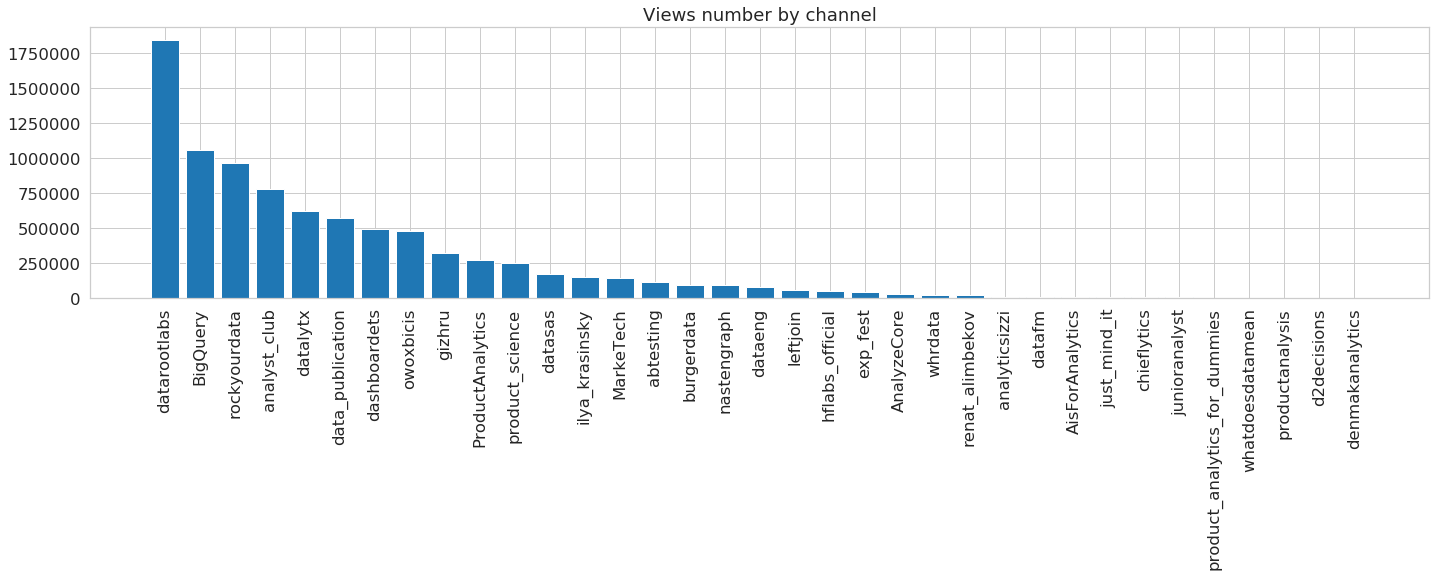

In [49]:
import matplotlib.pylab as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(24,5)) 
plt.bar(x,y)
plt.xticks(range(35), x, rotation='vertical')
plt.title('Views number by channel', fontsize=18)
#plt.savefig('views by date.png', fps=400)

In [50]:
total_views.groupby(total_views.channel).views_count_2.sum().sort_values(ascending=False)

channel
datarootlabs                     1848125
BigQuery                         1061483
rockyourdata                      970311
analyst_club                      779284
datalytx                          622415
data_publication                  571045
dashboardets                      493732
owoxbicis                         478302
gizhru                            324056
ProductAnalytics                  276957
product_science                   253370
datasas                           175978
ilya_krasinsky                    156500
MarkeTech                         147481
abtesting                         115004
burgerdata                         96335
nastengraph                        94188
dataeng                            80606
leftjoin                           58595
hflabs_official                    54409
exp_fest                           45188
AnalyzeCore                        33975
whrdata                            27830
renat_alimbekov                    27747
analytic

In [51]:
from collections import Counter

In [52]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

def get_words_by_threshold_report(text_series, min_df=0.02, max_df=0.75):
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

    counts = vectorizer.fit_transform(text_series)
    corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}

    print('Words in dictionary: {}\n'.format(counts.shape[1]))
    print('Dictionary before threshold filtration: ', Counter(' '.join(text_series.values).split()).most_common(20), '\n')

    print('Words under top threshold:   ', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[-40:][::-1]])
    print()
    print('Words upper bottom threshold:', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[:20]])
    return counts, vectorizer, corpus_id2word

def get_lda_model(counts, corpus_id2word, num_topics=10, alpha_value=0.1, var_iter=50, passes=50):
    gensim_corpus = gensim.matutils.Scipy2Corpus(counts)
    t_start = time.time()
    lda = gensim.models.LdaModel(
        corpus=gensim_corpus,
        passes=passes,
        num_topics=num_topics,
        alpha=[alpha_value] * num_topics,
        iterations=var_iter,
        id2word=corpus_id2word,
        eval_every=0,
        random_state=42
    )
    current_score = lda.bound(gensim_corpus)
    time_ellapsed = int(time.time() - t_start)

    print('ELBO = {1:.4f}, time: {2} seconds'.format(
        alpha_value, current_score, time_ellapsed))
    
    gamma, _ = lda.inference(gensim_corpus)
    gamma = gamma / gamma.sum(1).reshape(-1, 1)
    
    return lda, gamma

def build_topic_words_report(lda, top_words_num=25, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    topic_space = max(map(len, topic_names)) + 2
    
    if topic_space==2:
        for topic_index in range(lda.num_topics):
            print('{0} topic: {1}'.format(
                topic_index, ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        return
    
    for topic_index in range(lda.num_topics):
        print('{0} topic :{1: ^{2}}: {3}'.format(
            topic_index, topic_names[topic_index], topic_space,
            ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        
def build_topic_subjects_report(lda, gamma, text_series, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    for topic_index in range(lda.num_topics):
        print('Topic {0} - {1}'.format(topic_index, topic_names[topic_index]))
        best_doc_indexes = gamma[:, topic_index].argsort()[-10:][::-1]
        
        subjects_with_proba = []
        for person_count, doc in enumerate(best_doc_indexes):
            if gamma[doc, topic_index] > 0.01 or person_count<3:
                subjects_with_proba.append('{0} - {1:.1%}'.format(text_series.index[doc], gamma[doc, topic_index]))
        print(', '.join(subjects_with_proba), '\n')

In [53]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.005, max_df=0.35)

Words in dictionary: 1771

Dictionary before threshold filtration:  [('1', 1762), ('2', 1189), ('3', 1009), ('bi', 908), ('bigquery', 729), ('python', 699), ('5', 695), ('tableau', 617), ('0', 606), ('4', 579), ('science', 555), ('v', 532), ('learning', 501), ('sql', 495), ('github', 427), ('визуализации', 418), ('c', 401), ('r', 395), ('u', 372), ('machine', 357)] 

Words under top threshold:    ['bi', 'bigquery', 'python', 'tableau', 'science', 'learning', 'sql', 'github', 'визуализации', 'machine', 'visualization', 'engineer', 'amazon', 'product', 'ml', 'pandas', 'aws', 'big', 'design', 'дашборд', 'cloud', 'excel', 'метрики', '11', 'scientist', 'learn', 'api', 'решение', 'возможность', 'инструменты', 'engineering', 'chart', '100', 'модель', 'модели', '50', 'задачи', 'дашборда', 'пользователя', 'других']

Words upper bottom threshold: ['помощь', 'часа', 'предлагают', 'применить', 'присоединяйтесь', 'крутая', 'самому', 'хорошую', 'продолжение', 'стиле', 'созданию', 'никак', 'большое',

In [54]:
lda_norm, gamma_norm = get_lda_model(counts, corpus_id2word, num_topics=10)

ELBO = -859507.3469, time: 70 seconds


In [55]:
build_topic_words_report(lda_norm, top_words_num=15)

0 topic: метрики, метрик, маркетинг, пользователя, рекламных, bi, рекламы, маркетинга, продукта, dashboard, решений, вашего, оценки, клиентов, этих
1 topic: engineer, design, chart, learning, scientist, machine, science, storybench, senior, project, vision, tools, build, computer, said
2 topic: диаграммы, science, области, исследование, dataroot, интервью, подробности, ии, intelligence, 17, 11, сфере, создания, проект, книга
3 topic: 81, quarter, bb, b2, arxiv, gdp, increased, алгоритм, ba, bc, newsreleases, international, bureau, b4, bf
4 topic: amazon, aws, bi, etl, cloud, big, azure, snowflake, engineer, sql, redshift, тп, engineering, alexa, амазон
5 topic: hflabs, сразу, достаточно, этим, обычно, возможно, должны, график, дальше, история, дело, мало, значит, работа, слишком
6 topic: pandas, science, product, ux, design, neural, retention, метрики, conference, продукта, program, руководство, guide, автор, дизайн
7 topic: bi, tableau, визуализации, дашборд, excel, дашборда, дашбордо

In [56]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.025, max_df=0.45)
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

Words in dictionary: 25

Dictionary before threshold filtration:  [('1', 1762), ('2', 1189), ('3', 1009), ('bi', 908), ('bigquery', 729), ('python', 699), ('5', 695), ('tableau', 617), ('0', 606), ('4', 579), ('science', 555), ('v', 532), ('learning', 501), ('sql', 495), ('github', 427), ('визуализации', 418), ('c', 401), ('r', 395), ('u', 372), ('machine', 357)] 

Words under top threshold:    ['bi', 'bigquery', 'python', 'tableau', 'science', 'learning', 'sql', 'github', 'визуализации', 'machine', 'visualization', 'amazon', 'product', 'ml', 'big', 'cloud', 'метрики', '11', 'learn', 'решение', 'возможность', 'инструменты', '100', 'задачи', 'других']

Words upper bottom threshold: ['других', 'задачи', '100', 'инструменты', 'возможность', 'решение', 'learn', '11', 'метрики', 'cloud', 'big', 'ml', 'product', 'amazon', 'visualization', 'machine', 'визуализации', 'github', 'sql', 'learning']
ELBO = -27358.3721, time: 25 seconds


In [57]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
)
    #topic_names=['data scientist', 'game dev', 'marketing analyst', 'product analyst', 'business analyst'] * 5)

0 topic: bigquery, sql, product, big, метрики, cloud, ml, решение, других, learn, возможность, задачи, science, инструменты
1 topic: tableau, learning, visualization, machine, других, ml, learn, big, science, cloud, bi, 100, amazon, python
2 topic: bi, amazon, возможность, инструменты, решение, других, cloud, tableau, big, ml, sql, 100, визуализации, learn
3 topic: science, визуализации, задачи, cloud, инструменты, решение, других, product, ml, learn, big, visualization, возможность, learning
4 topic: python, github, 11, 100, learn, ml, других, решение, задачи, big, sql, learning, science, visualization


In [58]:
build_topic_subjects_report(lda_norm_45, gamma_norm_45, corpus['text'])

Topic 0 - 
3340 - 98.0%, 1167 - 96.5%, 5374 - 96.2%, 309 - 96.2%, 10416 - 95.3%, 3659 - 95.3%, 2808 - 95.3%, 6486 - 94.7%, 11719 - 94.7%, 6323 - 94.7% 

Topic 1 - 
7686 - 98.1%, 9923 - 97.2%, 5297 - 95.3%, 2235 - 95.3%, 11349 - 95.3%, 1360 - 94.7%, 2404 - 94.7%, 8824 - 93.8%, 8334 - 93.8%, 10943 - 93.8% 

Topic 2 - 
3576 - 97.0%, 11746 - 95.8%, 603 - 95.3%, 163 - 94.7%, 4044 - 94.7%, 9177 - 93.8%, 4588 - 93.8%, 992 - 92.7%, 6149 - 92.7%, 629 - 92.7% 

Topic 3 - 
8056 - 95.8%, 4844 - 93.8%, 7828 - 93.8%, 9996 - 92.7%, 6886 - 92.7%, 6441 - 92.7%, 2720 - 92.7%, 4828 - 92.7%, 10159 - 91.1%, 9159 - 91.1% 

Topic 4 - 
1393 - 95.3%, 1760 - 94.7%, 1888 - 94.7%, 10399 - 93.8%, 1589 - 93.8%, 3857 - 92.7%, 1202 - 92.7%, 9827 - 92.7%, 999 - 92.7%, 11012 - 92.7% 



In [59]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.001, max_df=0.45)

Words in dictionary: 10110

Dictionary before threshold filtration:  [('1', 1762), ('2', 1189), ('3', 1009), ('bi', 908), ('bigquery', 729), ('python', 699), ('5', 695), ('tableau', 617), ('0', 606), ('4', 579), ('science', 555), ('v', 532), ('learning', 501), ('sql', 495), ('github', 427), ('визуализации', 418), ('c', 401), ('r', 395), ('u', 372), ('machine', 357)] 

Words under top threshold:    ['bi', 'bigquery', 'python', 'tableau', 'science', 'learning', 'sql', 'github', 'визуализации', 'machine', 'visualization', 'engineer', 'amazon', 'product', 'ml', 'pandas', 'aws', 'big', 'design', 'cloud', 'дашборд', 'excel', 'метрики', '11', 'scientist', 'learn', 'api', 'решение', 'возможность', 'инструменты', 'engineering', 'chart', '100', 'модель', 'модели', '50', 'задачи', 'дашборда', 'пользователя', 'других']

Words upper bottom threshold: ['публичный', 'карпов', 'точные', 'cdo', 'карпова', 'точной', 'местных', 'точками', 'торговля', 'somewhere', 'русскими', 'мероприятиях', 'вводная', 'в

In [60]:
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -2057038.6570, time: 81 seconds


In [61]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
)

0 topic: bigquery, bi, sql, hflabs, запросов, клиентов, задачи, возможность, маркетинг, аналитик, python, наш, решение, писать
1 topic: learning, science, engineer, machine, github, ml, bigquery, scientist, python, deep, dataroot, tensorflow, senior, arxiv
2 topic: visualization, design, chart, product, location, appeared, money, help, national, storybench, well, could, project, take
3 topic: tableau, bi, python, aws, amazon, pandas, cloud, etl, sql, excel, azure, snowflake, 81, визуализации
4 topic: визуализации, дашборд, дашборда, метрики, диаграммы, должны, информации, визуализация, такие, график, ux, является, слишком, продукта


In [62]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.01, max_df=0.7)

Words in dictionary: 561

Dictionary before threshold filtration:  [('1', 1762), ('2', 1189), ('3', 1009), ('bi', 908), ('bigquery', 729), ('python', 699), ('5', 695), ('tableau', 617), ('0', 606), ('4', 579), ('science', 555), ('v', 532), ('learning', 501), ('sql', 495), ('github', 427), ('визуализации', 418), ('c', 401), ('r', 395), ('u', 372), ('machine', 357)] 

Words under top threshold:    ['bi', 'bigquery', 'python', 'tableau', 'science', 'learning', 'sql', 'github', 'визуализации', 'machine', 'visualization', 'engineer', 'amazon', 'product', 'ml', 'pandas', 'aws', 'big', 'design', 'дашборд', 'cloud', 'excel', 'метрики', '11', 'scientist', 'api', 'learn', 'решение', 'возможность', 'инструменты', 'engineering', 'chart', '100', 'модель', 'модели', 'задачи', '50', 'дашборда', 'пользователя', 'etl']

Words upper bottom threshold: ['30pm', 'тому', 'использует', 'выглядит', 'пару', 'появилась', 'зато', 'которым', 'нашем', 'можем', 'анализировать', 'конце', 'месте', 'изучать', 'одну', 

In [63]:
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=6)

ELBO = -374766.8553, time: 51 seconds


In [64]:
build_topic_words_report(
    lda_norm_45, top_words_num=10,
)

0 topic: visualization, design, chart, money, appeared, project, well, could, know, number
1 topic: bigquery, python, sql, github, aws, pandas, amazon, cloud, azure, api
2 topic: science, learning, machine, engineer, scientist, ml, engineering, deep, senior, dataroot
3 topic: product, location, help, experience, developers, online, build, web, open, campaign
4 topic: метрики, диаграммы, визуализации, достаточно, пользователя, этих, других, продукта, метрик, понять
5 topic: bi, tableau, визуализации, дашборд, excel, дашборда, etl, инструменты, snowflake, дашбордов


In [70]:
len(corpus['text'])

5997

In [71]:
from tqdm import tqdm
import gensim.corpora as corpora
from operator import itemgetter

In [72]:
min_df=0.01
max_df=0.7
vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
counts = vectorizer.fit_transform(corpus['text'])
corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}
tt = [key.split() for key, value in vectorizer.vocabulary_.items()]
dictionary = corpora.Dictionary(tt)
d = []
for tt in tqdm(corpus['text']):
    #print(tt)
    corpus_new = dictionary.doc2bow(tt.split())
    res = lda_norm_45.get_document_topics(corpus_new)
    d.append(
        {
            'text': tt,
            'target':max(res,key=itemgetter(1))[0]
        }
    )
    #print(max(res,key=itemgetter(1))[0])    
df_train = pd.DataFrame(d)    

100%|██████████| 5997/5997 [00:01<00:00, 5018.74it/s]


In [73]:
df_train.shape

(5997, 2)

In [54]:
df_train.loc[df_train.target == 2, 'target'] = 0

In [55]:
df_train.loc[df_train.target == 3, 'target'] = 1

In [57]:
df_train.loc[df_train.target == 4, 'target'] = 3
df_train.loc[df_train.target == 5, 'target'] = 0

In [60]:
df_train.loc[df_train.target == 3, 'target'] = 2

In [74]:
df_train.to_csv('df_train.csv')

In [69]:
df_train.target.value_counts()

4    3196
0    1036
5    1028
3     271
1     234
2     232
Name: target, dtype: int64

In [45]:
new_doc = corpus['text'][0]

In [46]:
# Remove Emails
data = re.sub('S*@S*s?', '', new_doc)
# Remove new line characters and extra space
data = re.sub('s+', ' ', data)
# Remove single quotes
data = re.sub("'", "", data)

In [47]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = stopwords.words('english')

In [48]:
### Lemmatization
data_lemma = []
lis = []
doc = nlp(data)
for token in doc:
    lis.append(token.lemma_)
data_lemma.append(' '.join(lis))
    
### Tokenization and gensim stopword removal

# You can look for all gensim stopwords by running -> 'gensim.parsing.preprocessing.STOPWORDS'

# Function to tokenize
# Also remove words whose length less than 3 (you can chang it)
def tokenization_with_gen_stop(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
            
    return result

In [49]:
from tqdm import tqdm

In [50]:
for txt in tqdm(data_lemma):
    print(txt)

100%|██████████| 1/1 [00:00<00:00, 8542.37it/s]

import car auto part   paki tan 2jkxozv


In [51]:
## Apply tokenization function
data_words = []
for txt in tqdm(data_lemma):
    data_words.append(tokenization_with_gen_stop(txt))
    
### NLTK Stopword removal (extra stopwords)

data_words_clean_new = []
for word in tqdm(data_words):
    for w in word:
        if w not in stop_words:
            data_words_clean_new.append(w)

100%|██████████| 1/1 [00:00<00:00, 10727.12it/s]


In [52]:
## Apply tokenization function
data_words = []
for txt in tqdm(data_lemma):
    data_words.append(tokenization_with_gen_stop(txt))
    
### NLTK Stopword removal (extra stopwords)

data_words_clean_new = []
for word in tqdm(data_words):
    for w in word:
        if w not in stop_words:
            data_words_clean_new.append(w)

100%|██████████| 1/1 [00:00<00:00, 6472.69it/s]


In [54]:
min_df=0.001
max_df=0.8
vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

counts = vectorizer.fit_transform(corpus['text'])
corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}

In [55]:
type(corpus_id2word)

dict

In [56]:
tt = [key.split() for key, value in vectorizer.vocabulary_.items()]

In [57]:
dictionary = corpora.Dictionary(tt)

In [58]:
data_words_clean_new

['import', 'auto', 'paki', 'jkxozv']

In [59]:
corpus_new = dictionary.doc2bow(data_words_clean_new)
corpus_new

[(0, 1), (2, 1)]

In [60]:
print(lda_norm_45.get_document_topics(corpus_new))

[(0, 0.8076587), (1, 0.03846485), (2, 0.038469233), (3, 0.038466875), (4, 0.038472854), (5, 0.038467526)]


In [61]:
res = lda_norm_45.get_document_topics(corpus_new)

In [62]:
type(res)

list

In [64]:
type(res[0])

tuple

In [65]:
from operator import itemgetter

In [66]:
max(res,key=itemgetter(1))[0]

0

In [62]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(corpus['text']))
print(data_words[:1])

[['import', 'car', 'auto', 'parts', 'pakistan', 'jkxozv']]


In [59]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['import', 'car', 'auto', 'parts', 'pakistan', 'jkxozv']


In [60]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [64]:
#drop stop_words
stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'за', 'было', 'ru', 'её', 'telegra','ph',
                  'com','www','ift','tt','jpg','file','d0', 'via','2018','d1','bit','ly','10','org','которые','очень', 'youtube', 'нужно', 'medium',
                  'google', 'данных', 'data', 'analytics', 'данные', 'research', 'который', 'blog', 'center', 'pew',
                  'который','20','youtu','также', 'года', 'работает', 'которая', 'данными', 'пользователей', 'помощью', 'работы', 'какие',
                   'time', 'png', '2017', '2019', 'несколько', 'новый', 'делать', 'просто', 'аналитики', 'сделать', 'какие', 
                   'почему', 'например', 'всем', 'решения', 'habr', 'статья', 'watch', 'видео', 'использовать', 
                   'время', 'youtu', 'пока', 'сегодня', 'поэтому', 'компании', '2020', 'пока',  'media', 'new', 'people', 'like', 'first', 'one', 
                   'time', 'post', 'owox','upshot','power','tag', 'flowingdata', 'tags', 'news', 'utm', 'лет', 'дата', 'смотреть', 'list', 'вообще', 
                   'людей', 'index', 'год', 'канал', 'человек', '04', 'mapbox','href','also', 'year', 'gov', 'many', 
                   'see', 'net', 'states', 'times', 'bea', 'years', 'analysis', 'state', 'would','ai','подробнее', 'позволяет', 'ga', 'facebook',
                   'курс', 'нам', 'analyst', 'аналитика', 'работать', 'вопросы', 'будут', 'вопрос', 'яндекс', 'могут', 'часто',
                   'team', 'images', 'max', 'cdn', 'maps', 'map', 'app', 'points', 'interest', 'search', 'event', 'use', 'story', '1024',
                   'html', 'make', 'get', 'want', 'world', 'two', 'every','say', 'americans', 'even', 'best', 'video', 'different', 'really',
                   'найти', 'обучения', 'день', 'бизнеса', 'времени', 'работу', 'стоит', 'можете', 'каждый',  'user', 'us', 'conversation', 'full',
                   'пример', 'towardsdatascience', 'percent', 'jobs', 'billion', 'pdf', '00', 'io', 'статьи', 'работе', 'аналитике', 'материалы', 'веб', 
                   'yandex', 'productanalytics', 'аналитиков', 'бесплатный', 'метод', 'master', 'анализа', 'club', 'системы', 'studio', 'информацию', 'графики',
                   'цвета', 'отчет', 'сайта', 'id', 'b0', 'dw', 'b5',  'b8', 'en', 'microsoft', 'bd', 'кстати', 'интересно', 'вебинар', 'общем', 'буду',
                   'всё', 'курсы', 'такое', 'работу', '12', 'сша', 'different', 'really', 'want', 'content', 'york', 'way', 'day', 'even', 'wp', 'video',
                   'времени', 'каждый', 'люди', 'можете', 'найти', 'продукт', 'россии', 'количество', 'продаж', 'команды', 'команда', 'co','vs', 'company', 
                   'model', 'кода', 'гайд', 'twitter',  'americans', 'percent', 'women', 'say', 'pewresearch', 'public', 'economic', 'text', 'read', 'personal',
                   '01', 'htm', '09', 'less', 'book', 'full', 'user', 'business', 'published', 'source', 'conversation', 'building', 'using', 'originally', 'highlighting',
                   'continuing', 'responding', 'users', 'goo', 'gl', 'rss', 'postid', 'howmuch', 'article', 'самом', 'деле', 'nytimes', 'interactive', 'wiki',
                   'wikipedia', 'точки', 'зрения', 'dou', 'ua', 'companies',' 80', '82', 'republicans', 'places', 'five', 'black', 'часть','30','онлайн',
                   'ссылка', 'статью', 'свой', 'посмотреть', 'ребята', 'именно', 'другие', 'часть', 'ниже', 'part', 'линк', 'ещё', '2016', 'та', '2016', '03',
                   'trump', 'income', 'election', 'country', 'still', 'house', 'howmuch', 'democrats', '000', '05', 'social', 'pay', 'хотя', 'показывает', 'важно', 'проблемы', 
                   'либо', 'случае', 'вроде', 'меньше', 'подход', 'статью', 'нашел', 'тех', 'цели', 'опыт', 'книг', 'написал', 'ещё', 'точки', 'понятно',
                   'need', 'five', 'used', 'find', 'go', 'part', 'based', 'think', 'good', 'live', 'uploads', 'анализ', 'онлайн', 'хочет', 'статью', 'бизнес', 'навыки', 'свои',
                   'канале', 'список', 'конференции', 'роста', 'нового', 'manager', 'стоимость', 'свой', '80', 'особенно', '82', 'немного', 'хотите', 'ссылке', 'году', 
                   'получить', 'аналитику', '19', 'сделали', 'которых', 'ссылка', 'материал'
                  ]),

stop_words.extend(stopwords.words('english'))

In [65]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['import', 'car', 'auto', 'part']]


In [66]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [67]:
id2word[0]

'auto'

In [79]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [80]:
lda_model.print_topics()

[(0,
  '0.032*"work" + 0.029*"look" + 0.028*"show" + 0.027*"take" + 0.026*"high" + 0.026*"make" + 0.023*"city" + 0.021*"start" + 0.020*"number" + 0.020*"experience"'),
 (1,
  '0.069*"других" + 0.061*"growth" + 0.059*"process" + 0.043*"тестирования" + 0.032*"function" + 0.024*"команд" + 0.014*"audio" + 0.008*"вычислении" + 0.007*"distribute" + 0.000*"orsa"'),
 (2,
  '0.138*"product" + 0.111*"tool" + 0.084*"визуализации" + 0.053*"тему" + 0.024*"early" + 0.022*"человека" + 0.010*"давно" + 0.006*"television" + 0.003*"gopractice" + 0.000*"design"'),
 (3,
  '0.111*"appear" + 0.062*"likely" + 0.000*"remain" + 0.000*"policy" + 0.000*"college" + 0.000*"support" + 0.000*"several" + 0.000*"proposal" + 0.000*"draw" + 0.000*"gun"'),
 (4,
  '0.131*"visualization" + 0.064*"cloud" + 0.058*"event" + 0.045*"course" + 0.043*"azure" + 0.033*"ca" + 0.030*"podcast" + 0.023*"global" + 0.019*"диаграммы" + 0.017*"away"'),
 (5,
  '0.112*"value" + 0.044*"experiment" + 0.021*"practice" + 0.017*"desktop" + 0.017*"

In [81]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -24.676159390038656

Coherence Score:  0.45857623203932113


In [82]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.463833 -0.008059       1        1  35.488960
11    -0.003598 -0.118816       2        1   8.244725
18     0.000281 -0.042702       3        1   7.930760
10    -0.006135  0.269375       4        1   6.936905
4      0.014238 -0.012932       5        1   6.124870
15     0.010625 -0.015671       6        1   5.877527
2      0.024084 -0.008500       7        1   4.632007
8      0.019184 -0.010364       8        1   3.648176
7      0.029300 -0.006764       9        1   3.424740
19     0.032625 -0.005307      10        1   2.344926
1      0.032455 -0.005391      11        1   2.321063
16     0.033313 -0.004913      12        1   1.877467
14     0.034790 -0.003815      13        1   1.862301
13     0.033440 -0.004845      14        1   1.694282
5      0.034536 -0.004041      15        1   1.650220
6      0.034617 -0.003967      16        1   1.455116
17     0.035144 -0.003091      17        1   1.424620
9      0.034913 -0.003525      18        1   1.312432
3      0.035013 -0.003323      19        1   0.926744
12     0.035007 -0.003348      20        1   0.822153, topic_info=               Term         Freq        Total Category  logprob  loglift
382         science  1035.000000  1035.000000  Default  30.0000  30.0000
394   visualization   924.000000   924.000000  Default  29.0000  29.0000
283         product   740.000000   740.000000  Default  28.0000  28.0000
257            tool   595.000000   595.000000  Default  27.0000  27.0000
435             big   722.000000   722.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
935             may     0.036316     2.065795  Topic20 -10.1677   0.7600
1474           case     0.036312     2.064896  Topic20 -10.1678   0.7603
2126           game     0.036312     2.065596  Topic20 -10.1678   0.7600
1103           hour     0.036310     2.064723  Topic20 -10.1679   0.7604
919              go     0.036311     2.065438  Topic20 -10.1679   0.7600

[785 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
411      15  0.953195    ab_teste
43        4  0.993439      access
44        4  0.993558    activity
45        5  0.979760    advanced
550      10  0.976983    american
...     ...       ...         ...
315      14  0.969177       целом
473       7  0.985008    человека
379      16  0.923065        чему
519       3  0.969290      штатах
401       5  0.671396  элементами

[272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 12, 19, 11, 5, 16, 3, 9, 8, 20, 2, 17, 15, 14, 6, 7, 18, 10, 4, 13])

In [83]:
pyLDAvis.show(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [11/Nov/2020 17:17:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Nov/2020 17:17:16] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [11/Nov/2020 17:17:16] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [11/Nov/2020 17:17:16] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


In [84]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [88]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=1)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (38,) and (7,)

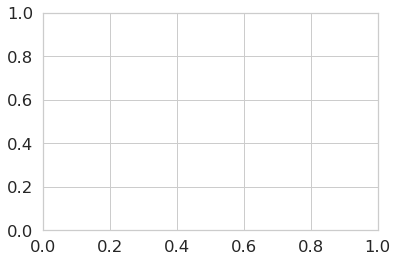

In [89]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [90]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2925
Num Topics = 3  has Coherence Value of 0.4295
Num Topics = 4  has Coherence Value of 0.4004
Num Topics = 5  has Coherence Value of 0.4347
Num Topics = 6  has Coherence Value of 0.4184
Num Topics = 7  has Coherence Value of 0.4058
Num Topics = 8  has Coherence Value of 0.4221


In [92]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.020*"work" + 0.020*"create" + 0.019*"tool" + 0.018*"make" + 0.016*"project" + 0.016*"talk" + 0.015*"podcast" + 0.010*"challenge" + 0.010*"idea" + 0.009*"give"'), (1, '0.024*"других" + 0.024*"решении" + 0.013*"проблем" + 0.012*"базы" + 0.012*"этих" + 0.011*"информации" + 0.011*"человека" + 0.011*"решили" + 0.010*"experiment" + 0.009*"марта"'), (2, '0.029*"поможет" + 0.020*"guide" + 0.013*"яндекса" + 0.012*"доклад" + 0.012*"introduction" + 0.012*"тестирования" + 0.011*"недавно" + 0.010*"главныи" + 0.010*"spark" + 0.009*"databrick"'), (3, '0.024*"event" + 0.023*"lead" + 0.021*"learn" + 0.020*"open" + 0.019*"work" + 0.019*"join" + 0.017*"technology" + 0.016*"system" + 0.016*"online" + 0.014*"program"'), (4, '0.022*"large" + 0.020*"article" + 0.016*"make" + 0.015*"average" + 0.015*"number" + 0.014*"money" + 0.014*"big" + 0.013*"home" + 0.012*"market" + 0.012*"lot"'), (5, '0.033*"design" + 0.025*"learn" + 0.024*"survey" + 0.016*"view" + 0.015*"adult" + 0.013*"web" + 0.013*"question" 

In [96]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [102]:
X = corpus.text

AttributeError: 'list' object has no attribute 'text'

In [44]:
cv = CountVectorizer(ngram_range=(1,1), analyzer='word')
train_X_cv = cv.fit_transform(X.values)

In [45]:
tsvd = TruncatedSVD(n_components=50, random_state=42)
train_X_svd = tsvd.fit_transform(train_X_cv)
tsne = TSNE(n_components=2, random_state=42)
train_X_tsne = tsne.fit_transform(train_X_svd)

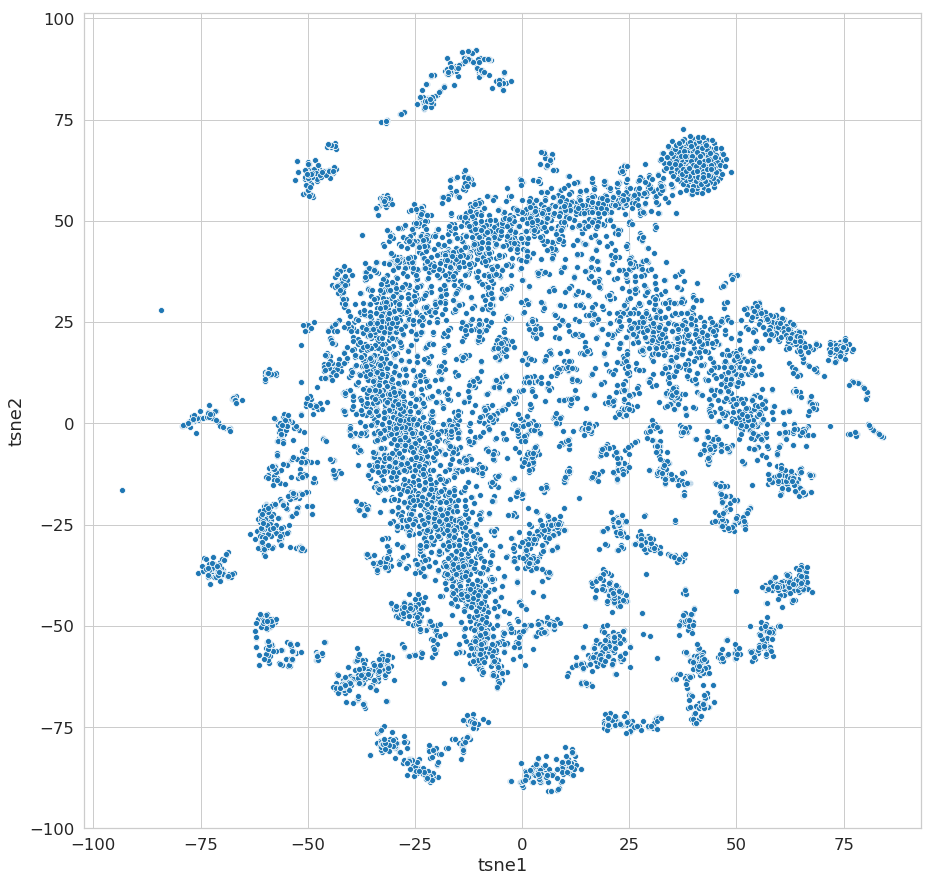

In [46]:
df = pd.DataFrame()
df["tsne1"] = pd.Series(train_X_tsne[:, 0])
df["tsne2"] = pd.Series(train_X_tsne[:, 1])
plt.figure(figsize=(15, 15))
sns.scatterplot(
    df["tsne1"], df["tsne2"], data=df
)
plt.show()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [100]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X)

NameError: name 'X' is not defined

In [101]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(tfidf).score(tfidf) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

NameError: name 'tfidf' is not defined

/home/renat/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/renat/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


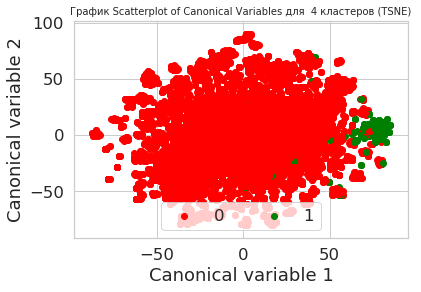

In [50]:
model4=KMeans(n_clusters=2)
model4.fit(tfidf)
# plot clusters

from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
clf = TruncatedSVD(200)
Xpca = clf.fit_transform(tfidf)

plot_columns = tsne.fit_transform(Xpca)


#Merge pca results with cluster_ids for future reference
pca_clusters_tsne4 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model4.labels_[:]})

#Adding a legend with labels
colors= ['r','g','b']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 3

for i in range(0, plot_columns.shape[0]):
    c[model4.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model4.labels_[i]],label=model4.labels_[i])

import matplotlib
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2'],loc='lower center', ncol=3)
plt.title(u'График Scatterplot of Canonical Variables для  4 кластеров (TSNE)')
plt.show()